# Cyclistic Bike Share Analysis

## Introduction

## Ask

For this report, we will be focusing on one question:

-  How do annual members and casual riders use Cyclistic bikes differently?

### Library Installed
- pandas
- numpy
- seaborn
- matplotlib

In [31]:
%pip install pandas numpy seaborn matplotlib 


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Data Source (Prepare)

We gather data from [a dataset](https://divvy-tripdata.s3.amazonaws.com/index.html) about cyclistic rides. The data source schema is as follows:

- ride_id: Unique identifier for each ride
- rideable_type: Type of bike used in the ride
- started_at: Date and time the ride started
- ended_at: Date and time the ride ended
- start_station_name: Name of the start station
- start_station_id: Unique identifier for the start station
- end_station_name: Name of the end station
- end_station_id: Unique identifier for the end station
- start_lat: Latitude of the start station
- start_lng: Longitude of the start station
- end_lat: Latitude of the end station
- end_lng: Longitude of the end station
- member_casual: Indicates whether the rider is a member or casual rider

The data source is organized by an anonymyzed rider_id. This rider_id is unique to the rider themselves. As we go along, you will see how we clean the data we got from the Cyclistic data source. We use pandas to help clean up and verify the data.

To download the Cyclistic data, run the following code:

In [32]:
# Clean up all sources from previous runs
!rm *.zip
!rm *.csv
!rm -rf __MACOSX/
# Download all sources
!wget https://divvy-tripdata.s3.amazonaws.com/202307-divvy-tripdata.zip
!wget https://divvy-tripdata.s3.amazonaws.com/202308-divvy-tripdata.zip
!wget https://divvy-tripdata.s3.amazonaws.com/202309-divvy-tripdata.zip
!wget https://divvy-tripdata.s3.amazonaws.com/202310-divvy-tripdata.zip
!wget https://divvy-tripdata.s3.amazonaws.com/202311-divvy-tripdata.zip
!wget https://divvy-tripdata.s3.amazonaws.com/202312-divvy-tripdata.zip
!wget https://divvy-tripdata.s3.amazonaws.com/202401-divvy-tripdata.zip
!wget https://divvy-tripdata.s3.amazonaws.com/202402-divvy-tripdata.zip
!wget https://divvy-tripdata.s3.amazonaws.com/202403-divvy-tripdata.zip
!wget https://divvy-tripdata.s3.amazonaws.com/202404-divvy-tripdata.zip
!wget https://divvy-tripdata.s3.amazonaws.com/202405-divvy-tripdata.zip
!wget https://divvy-tripdata.s3.amazonaws.com/202406-divvy-tripdata.zip
# Unzip all sources
!unzip 202307-divvy-tripdata.zip
!unzip 202308-divvy-tripdata.zip
!unzip 202309-divvy-tripdata.zip
!unzip 202310-divvy-tripdata.zip
!unzip 202311-divvy-tripdata.zip
!unzip 202312-divvy-tripdata.zip
!unzip 202401-divvy-tripdata.zip
!unzip 202402-divvy-tripdata.zip
!unzip 202403-divvy-tripdata.zip
!unzip 202404-divvy-tripdata.zip
!unzip 202405-divvy-tripdata.zip
!unzip 202406-divvy-tripdata.zip

--2024-07-15 14:11:54--  https://divvy-tripdata.s3.amazonaws.com/202307-divvy-tripdata.zip
Resolving divvy-tripdata.s3.amazonaws.com (divvy-tripdata.s3.amazonaws.com)... 54.231.195.137, 3.5.28.191, 3.5.28.136, ...
Connecting to divvy-tripdata.s3.amazonaws.com (divvy-tripdata.s3.amazonaws.com)|54.231.195.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28544756 (27M) [application/zip]
Saving to: ‘202307-divvy-tripdata.zip’

202307-divvy-tripda 100%[===================>]  27.22M  1.21MB/s    in 23s     

2024-07-15 14:12:18 (1.20 MB/s) - ‘202307-divvy-tripdata.zip’ saved [28544756/28544756]

--2024-07-15 14:12:18--  https://divvy-tripdata.s3.amazonaws.com/202308-divvy-tripdata.zip
Resolving divvy-tripdata.s3.amazonaws.com (divvy-tripdata.s3.amazonaws.com)... 54.231.235.1, 3.5.29.200, 52.217.172.129, ...
Connecting to divvy-tripdata.s3.amazonaws.com (divvy-tripdata.s3.amazonaws.com)|54.231.235.1|:443... connected.
HTTP request sent, awaiting response... 200 OK

Now that we have downloaded all our data sources, we will start loading them into data frames.

## Data Loading and Cleanup (Process)

The first thing we need to do is import our libraries that we will be using. In our case, we will be using pandas, numpy, seaborn, and matplotlib. Pandas and numpy are data management tools while seaborn and matplotlib are data visualization tools. 

In [33]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

Once imported, we will focus our attention on the Cyclistic data. We will be using the Cyclistic data from 2023-07 to 2024-06 to cover a year's worth of data. Each data frame contains one months worth of anonymized ride data from Cyclistic. We load all our trip data into it's own data frame. 

In [34]:
trip_data_202307 = pd.read_csv('202307-divvy-tripdata.csv')
trip_data_202308 = pd.read_csv('202308-divvy-tripdata.csv')
trip_data_202309 = pd.read_csv('202309-divvy-tripdata.csv')
trip_data_202310 = pd.read_csv('202310-divvy-tripdata.csv')
trip_data_202311 = pd.read_csv('202311-divvy-tripdata.csv')
trip_data_202312 = pd.read_csv('202312-divvy-tripdata.csv')
trip_data_202401 = pd.read_csv('202401-divvy-tripdata.csv')
trip_data_202402 = pd.read_csv('202402-divvy-tripdata.csv')
trip_data_202403 = pd.read_csv('202403-divvy-tripdata.csv')
trip_data_202404 = pd.read_csv('202404-divvy-tripdata.csv')
trip_data_202405 = pd.read_csv('202405-divvy-tripdata.csv')
trip_data_202406 = pd.read_csv('202406-divvy-tripdata.csv')

Next, we want to merge all our trip data into one data frame. This data frame will be called `df`. First, we load all the data. Then we reset the index inplace (LOC 5). Once done, we convert the `started_at` and `ended_at` columns to datetime objects, then convert `member_casual` into a category. The rest of the columns will be converted to string objects with the exception of our long/lat fields. They will stay floats.

In [35]:
df = pd.concat(
    [trip_data_202307, trip_data_202308, trip_data_202309, trip_data_202310, trip_data_202311, trip_data_202312,
     trip_data_202401, trip_data_202402, trip_data_202403, trip_data_202404, trip_data_202405, trip_data_202406])

df.reset_index(inplace=True)

df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')
df['member_casual'] = df['member_casual'].astype('category')
df['ride_id'] = df['ride_id'].astype('string')
df['rideable_type'] = df['rideable_type'].astype('string')
df['start_station_name'] = df['start_station_name'].astype('string')
df['start_station_id'] = df['start_station_id'].astype('string')
df['end_station_name'] = df['end_station_name'].astype('string')
df['end_station_id'] = df['end_station_id'].astype('string')

df.head()

,index,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member
1,1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member
2,2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member
3,3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member
4,4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member


Now that we have a data frame that is ready for analysis, we will drop all rows with null values and duplicate rows. This will reduce our row count to just reliable data.

In [36]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

df.count()

index                 3780022
ride_id               3780022
rideable_type         3780022
started_at            3780022
ended_at              3780022
start_station_name    3780022
start_station_id      3780022
end_station_name      3780022
end_station_id        3780022
start_lat             3780022
start_lng             3780022
end_lat               3780022
end_lng               3780022
member_casual         3780022
dtype: int64

Now that we have the basics in for cleaning, we will add some new columns to our data frame to help us analyze our data.

- `ride_length`: The length of the ride in minutes
- `ride_day`: The day of the week the ride started
- `ride_hour`: The hour of the day the ride started
- `ride_month`: The month of the year the ride started
- `start_time`: The time of the day the ride started
- `end_time`: The time of the day the ride ended

In [37]:
df['ride_length'] = (df['ended_at'] - df['started_at']) / \
    np.timedelta64(1, 'm')
df['ride_day'] = df['started_at'].dt.dayofweek
df['ride_hour'] = df['started_at'].dt.hour
df['ride_month'] = df['started_at'].dt.month
df['start_time'] = df['started_at'].dt.time
df['end_time'] = df['ended_at'].dt.time

OK, now we need to find our outliers and drop them. We will be using the [IQR method](https://en.wikipedia.org/wiki/Interquartile_range) to identify outliers.

In [38]:
# Calculate the IQR
Q1 = df['ride_length'].quantile(0.25)
Q3 = df['ride_length'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['ride_length'] >= lower_bound) & (df['ride_length'] <= upper_bound)]

# Print the new shape of the DataFrame
print(df.shape)
print(df.count())

(3488744, 20)
index                 3488744
ride_id               3488744
rideable_type         3488744
started_at            3488744
ended_at              3488744
start_station_name    3488744
start_station_id      3488744
end_station_name      3488744
end_station_id        3488744
start_lat             3488744
start_lng             3488744
end_lat               3488744
end_lng               3488744
member_casual         3488744
ride_length           3488744
ride_day              3488744
ride_hour             3488744
ride_month            3488744
start_time            3488744
end_time              3488744
dtype: int64


Now that we have outliers out, we will analyze our data.

## Analysis of data

The first thing we want to ask ourselves is how are members and casuals using Cyclistic? What is the main difference between them?

To check this out, we need to count the number of rides for each member type and display the results as a bar chart.

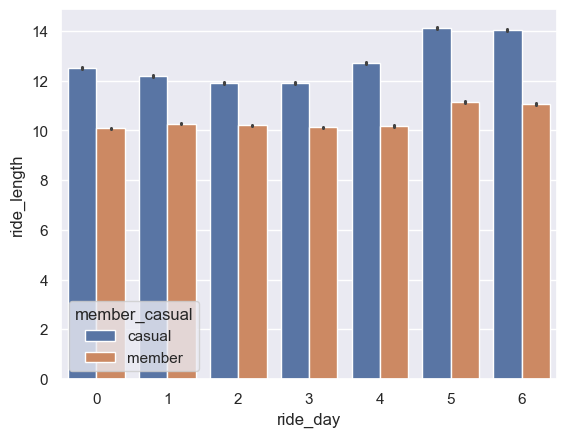

In [39]:
sns.barplot(
    df,
    x="ride_day",
    y="ride_length",
    hue="member_casual",
    estimator=np.mean
)
plt.show()

As you can see, casuals take longer rides than other members, with the number of members who ride being almost consistent, with casuals riding a lot during the weekends. We can deduce that casuals ride longer than members, and their ride lengths are longer during weekends while member ride lengths stay almost steady.

Truth 1: Casuals ride longer than members
Truth 2: Casuals ride longer during weekends

Now, let's look at the average total rides per member and casual. This will help us understand how the casuals and members different in usage. 

Average rides per member:  2392758
Percentage of rides that were from members 68.58508391558681
Average rides per casual:  1095986
Percentage of rides that were from casuals 31.414916084413186


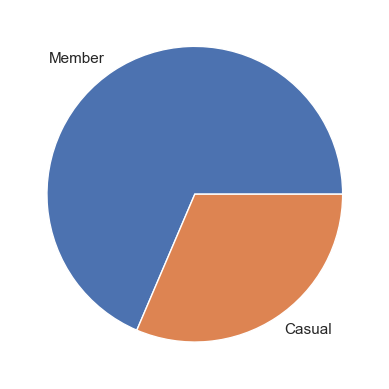

In [40]:
total_rides = df['ride_id'].count()
total_rides_member = df[df['member_casual'] == 'member']['ride_id'].count()
print("Average rides per member: ", total_rides_member)
print("Percentage of rides that were from members", total_rides_member / total_rides * 100)
total_rides_casual = df[df['member_casual'] == 'casual']['ride_id'].count()
print("Average rides per casual: ", total_rides_casual)
print("Percentage of rides that were from casuals",
      total_rides_casual / total_rides * 100)

plt.pie(x=[total_rides_member, total_rides_casual], labels=["Member", "Casual"])
plt.show()

Members account for 69% of all rides. Casuals account for 31% of all rides. So, members account for more rides than casuals. They are trying to get their money's worth. Now, let's look at the average ride length per member and casual. We will be using a line plot to visualize this. 

/Users/ejmatta/github.com/ematta/cyclistic/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


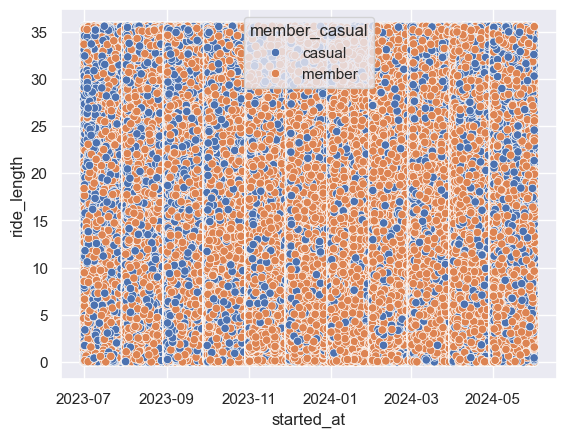

In [41]:
df_filtered = df[(df['ride_length'] >= 0) & (df['ride_length'] <= 60)]
sns.scatterplot(df_filtered, x="started_at", y="ride_length", hue="member_casual")
plt.show()


This scatter plit shows more casuals than members, meaning that there is a possibility that members get their bikes at a precise time.

Let's look deeper into days of the week and their meaning to member/casual usage.

In [42]:
day_with_most_ride_casual = df_filtered[df_filtered['member_casual'] == 'casual']['ride_day'].value_counts().idxmax()
print("Day with most ride for casual (0-Sunday) is: ", day_with_most_ride_casual, " day of the week")
day_with_most_ride_member = df_filtered[df_filtered['member_casual'] == 'member']['ride_day'].value_counts().idxmax()
print("Day with most ride for member (0-Sunday) is: ", day_with_most_ride_member, " day of the week")

Day with most ride for casual (0-Sunday) is:  5  day of the week
Day with most ride for member (0-Sunday) is:  2  day of the week


Casuals ride more towards the end of the week vs members, who start towards the begining. I suspect this might be due to workers vs weekenders. 


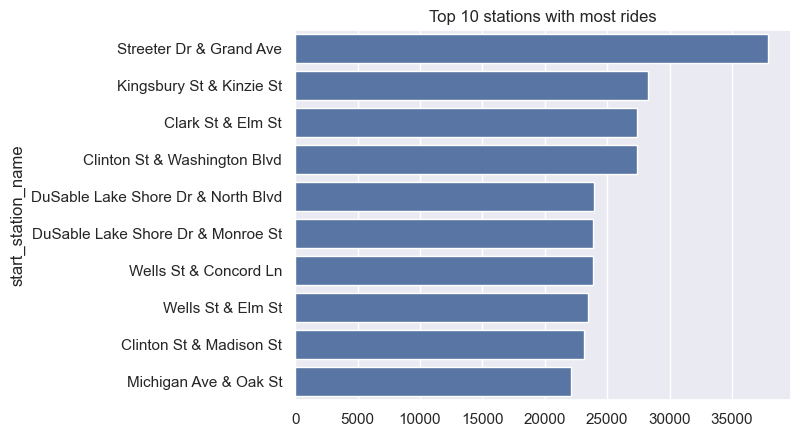

In [43]:
# Top 10 stations with most rides grouped by member_casual
top_10_stations = df['start_station_name'].value_counts().head(10)
sns.barplot(y=top_10_stations.index, x=top_10_stations.values).set_title('Top 10 stations with most rides')
plt.show()

Now let's look at the top 10 stations end stations.

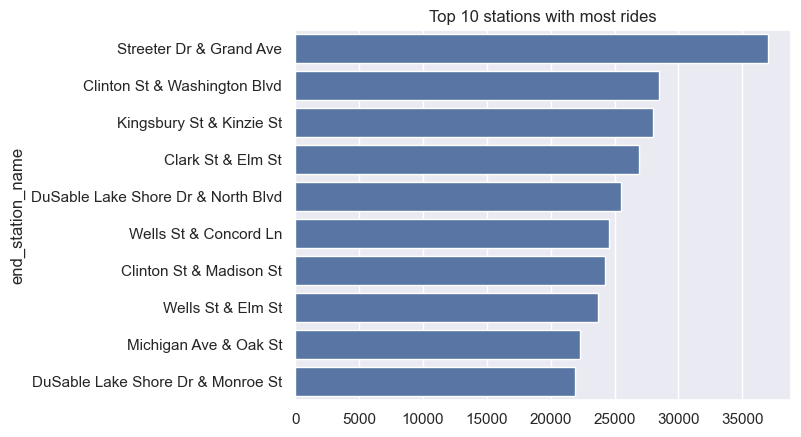

In [44]:
# Top 10 stations with most rides grouped by member_casual
top_10_stations = df['end_station_name'].value_counts().head(10)
sns.barplot(y=top_10_stations.index, x=top_10_stations.values).set_title('Top 10 stations with most rides')
plt.show()

We see that Streeter Dr. & Grand Ave is the top station for pickups AND dropoffs. Now, lets dive into how this will look like per casual vs member.

/var/folders/0z/s8q5j9sj52s90llyhn7nhj5m0000gn/T/ipykernel_46586/3672804663.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_stations = df.groupby(['start_station_name', 'member_casual']).size().reset_index(name='count').nlargest(10, 'count')


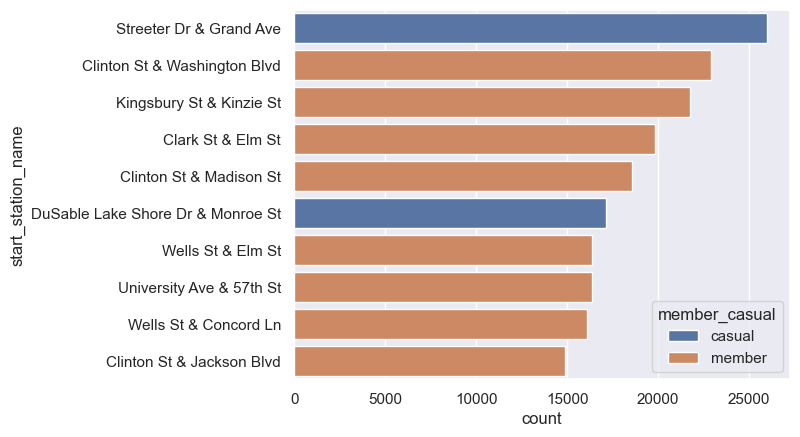

,start_station_name,member_casual,count
2896,Streeter Dr & Grand Ave,casual,25958
407,Clinton St & Washington Blvd,member,22902
943,Kingsbury St & Kinzie St,member,21770
353,Clark St & Elm St,member,19849
399,Clinton St & Madison St,member,18568
552,DuSable Lake Shore Dr & Monroe St,casual,17138
3007,Wells St & Elm St,member,16387
2933,University Ave & 57th St,member,16367
3005,Wells St & Concord Ln,member,16109
395,Clinton St & Jackson Blvd,member,14865


In [45]:
top_10_stations = df.groupby(['start_station_name', 'member_casual']).size().reset_index(name='count').nlargest(10, 'count')
sns.barplot(y=top_10_stations['start_station_name'], x=top_10_stations['count'], hue=top_10_stations['member_casual'])
plt.show()
top_10_stations

Next, let's look at average ride length per member and casual.

/var/folders/0z/s8q5j9sj52s90llyhn7nhj5m0000gn/T/ipykernel_46586/2637878551.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ride_length = df.groupby('member_casual')['ride_length'].mean()


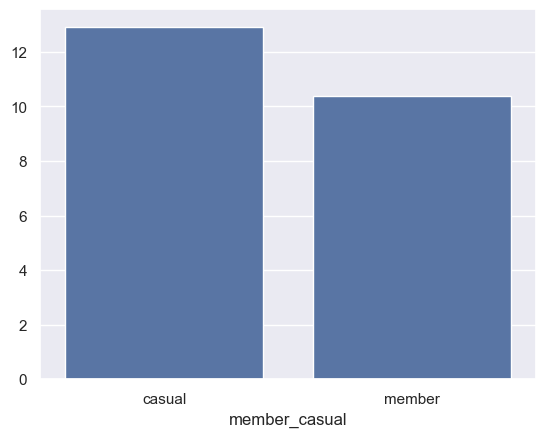

In [46]:
# Average ride length group by member_casual
average_ride_length = df.groupby('member_casual')['ride_length'].mean()
sns.barplot(x=average_ride_length.index, y=average_ride_length.values)
plt.show()

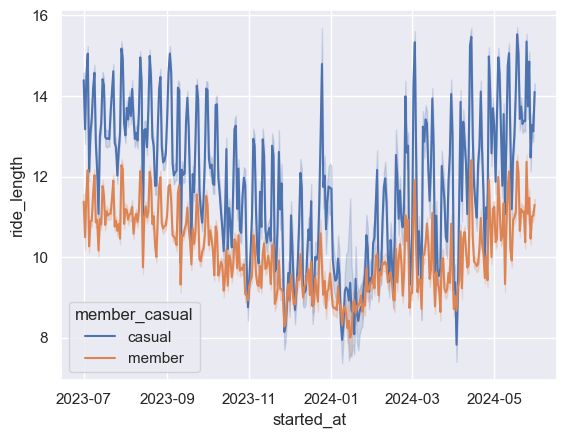

In [47]:
# Line graph of ride_length by started_at date grouped by member_casual
sns.lineplot(x=df['started_at'].dt.date, y=df['ride_length'], hue=df['member_casual'])
plt.show()

There are a couple of things we can extrapolate from this data. During winter time, there are lower casual rides than other times of the year. Our lowest dip is in Janurary. However, we do see that members have a higher average ride length than casuals.

Now, let's look at member_casual to rideable_type.

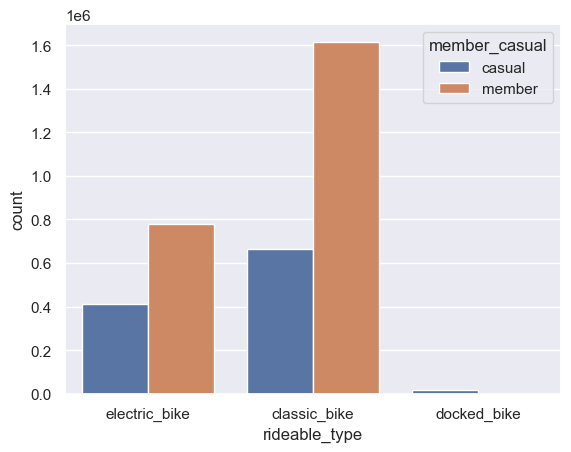

In [48]:
# bar plot of a count of ride types by member_casual
sns.countplot(x=df['rideable_type'], hue=df['member_casual'])
plt.show()

As you can see, both casuals and members use the classic bike type most. The docked_bike type is exclusively used by members.

## What to do?

1. Weekend activity is important to our casual users, so let's focus on selling weekend packages. This will help ensure that we can convert casual users to member users. By creating a weekend only pass, we might be able to convert these folks and introduce a lower-priced tier for introduction.
2. Membership benefits around weekend events, as well as introducing pay-as-you-ride packages. Some of our casuals might not like a monthly fee, and they might find a flat fee conflicting with how they use the product. By introducing a pay-as-you-ride scheme, we can provide a lower price for our casuals. Longer riders can pay, but the benefits of membership looks more appealing the further they ride.
3. Introduce seasonal prices, where we can offer lower fares during winter months. This should entice folks to ride with us during low dips in usage.

